# Segmentación de especies de plantas Iris con análisis de grupos (Clustering analysis)

El dataset de las plantas Irirs es uno de los más populares en Machine Learning. Para este caso haremos uso de análisis de grupos para segmentar los distintos tipos de especies de la planta Iris en base a las medidas de sus pétalos y sépalos.

El conjunto de datos contiene las siguientes entradas para cada planta observada:

<ul>
    <li>Largo del sépalo (sepal_length)</li>
    <li>Ancho del sépalo (sepal_width)</li>
    <li>Largo del pétalo (petal_length)</li>   
    <li>Ancho del pétalo (petal_width)</li>
</ul>

## Importando las librerias relevantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Cargando los datos

Cargamos los datos del archivo csv: <i> 'iris_dataset.csv'</i>.

In [2]:
datos = pd.read_csv('iris_dataset.csv')
datos

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Graficando los datos

Graficaremos los largos y anchos de los sépalos(sepal) y pétalos(petal).
<br>
La idea principal es poder segmentar cada especie según las medidas de largo y ancho de sus sépalos y pétalos

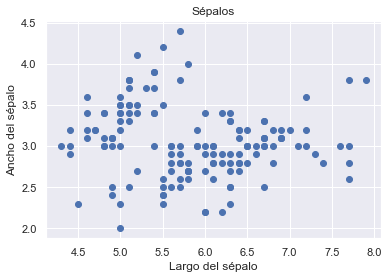

In [3]:
plt.scatter(datos['sepal_length'],datos['sepal_width'])
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

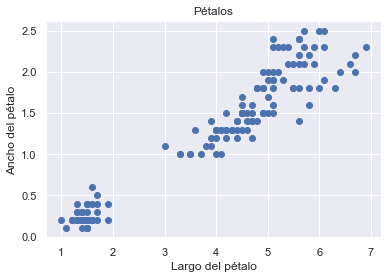

In [4]:
plt.scatter(datos['petal_length'],datos['petal_width'])
plt.title('Pétalos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

## Estandarizando las variables

In [5]:
from sklearn import preprocessing
x_escalado = preprocessing.scale(datos)

## Utilizando el 'Método del codo' para elegir el número de clusters

### Within-Cluster-Sum-of-Squares (WCSS)

In [6]:
# La cantidad óptima de clusters a utilizar no necesariamente se conoce de antemano
# por lo que es necesario aplicar una técnica conocida como el Método del Codo o Elbow Method
# a fin de determinar dicho valor.
# Básicamente, este método busca seleccionar la cantidad ideal de grupos a partir de la optimización
# de la WCSS (Within Clusters Summed Squares).
# Se pueden seleccionar distintos números de clusters en los puntos en los que se producen los mayores cambios del WCSS

wcss = []
max_clusters = 10

for i in range (1,max_clusters):
    kmeans= KMeans(i)
    kmeans.fit(x_escalado)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.42714544645858,
 91.06480287332293,
 81.94618740108614,
 72.45244858897985,
 63.17699404831492,
 54.34294607489976]

### Graficando el método del codo

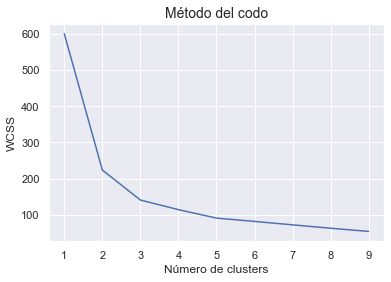

In [7]:
numero_de_clusters = range(1,max_clusters)
plt.plot(numero_de_clusters, wcss)
plt.title('Método del codo', size = 14)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

En base al Método del codo, se puede apreciar que los mayores cambios son en el número de clusters 2, 3 y 5. Por lo tanto, trabajaremos con dichos números

## 2 clusters

Empezamos separando los datos estandarizados en 2 grupos

In [8]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_escalado)

KMeans(n_clusters=2)

Construimos un grafico de dispersión de los datos originales usando los datos estandarizados

In [9]:
x = datos.copy()
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_escalado)

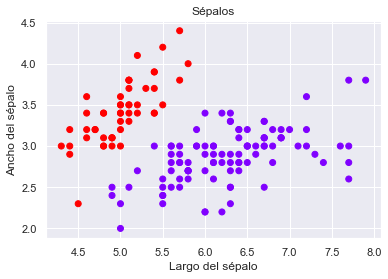

In [10]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

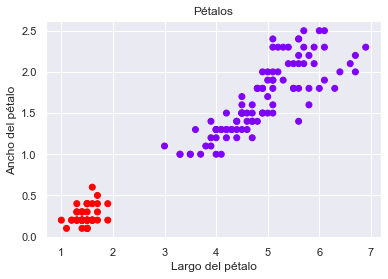

In [11]:
plt.scatter(clusters_2['petal_length'], clusters_2['petal_width'], c= clusters_2['cluster_pred'], cmap = 'rainbow')
plt.title('Pétalos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

## 3 Clusters

Hacemos lo mismo para agrupaciones de 3 y 5

In [12]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_escalado)

KMeans(n_clusters=3)

In [13]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_escalado)

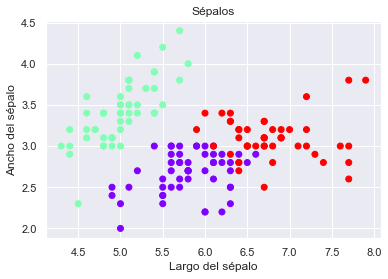

In [14]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

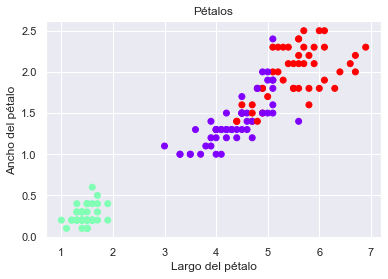

In [15]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.title('Pétalos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

## 5 Clusters

In [16]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_escalado)

KMeans(n_clusters=5)

In [17]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_escalado)

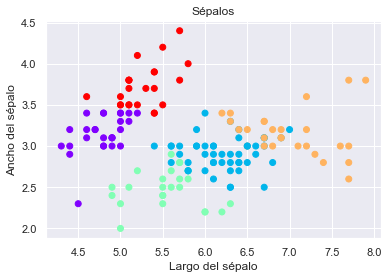

In [18]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

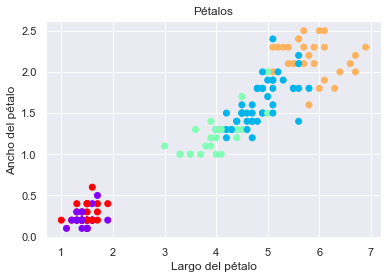

In [19]:
plt.scatter(clusters_5['petal_length'], clusters_5['petal_width'], c= clusters_5['cluster_pred'], cmap = 'rainbow')
plt.title('Pétalos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

## Comparando con datos reales de Iris

Los datos con la solución real los obtenemos del archivo 'iris_solucion_real.csv'

In [20]:
datos_reales = pd.read_csv('iris_solucion_real.csv')
datos_reales.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Para empezar, podemos ver que en realidad solo existen 3 especies de Iris (setosa, versicolor, virginica)
datos_reales['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
# Asignamos valores numerícos a la columna 'species' dependiendo de si se trata de una especie setosa, versicolor o virginica.
datos_reales['species'] = datos_reales['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [23]:
datos_reales.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Gráfico de dispersión de los datos reales

Viendo el gráfico de sépalos podemos dar cuenta que hay datos más superpuestos que en nuestra agrupación de 3 especies.

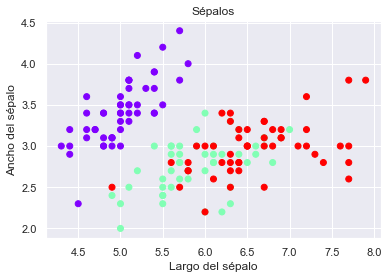

In [24]:
plt.scatter(datos_reales['sepal_length'], datos_reales['sepal_width'], c= datos_reales['species'], cmap = 'rainbow')
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

El gráfico de dispersión de los pétalos muestra una segmentación mas definida

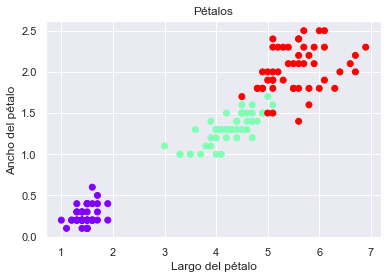

In [25]:
plt.scatter(datos_reales['petal_length'], datos_reales['petal_width'], c= datos_reales['species'], cmap = 'rainbow')
plt.title('Pétalos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.show()

### Conclusión

Si bien el método de clustering para este caso no es más adecuado, ayuda a hacer una aproximacion de la cantidad de especies existentes. Estos resultados pueden mejorarse aún más si se consideran otros análisis que ayuden a reducir la incertidumbre a la hora de clasificar especies.

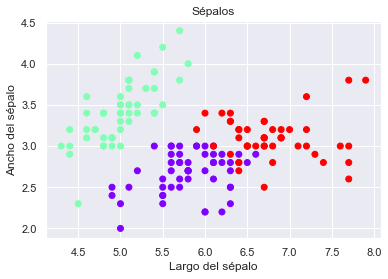

In [26]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.title('Sépalos')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.savefig('Clustering.png', bbox_inches = "tight")
plt.show()